In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import seaborn as sns
import scipy as scp
sns.set_context('paper', font_scale=1.33)

In [2]:
metaMIMIC = pd.read_csv('../1_metaMIMIC_data/metaMIMIC.csv')
mimic_names = {'hypotension_diagnosed': 'hypotension', 'anemia_diagnosed': 'anemia',
               'purpura_diagnosed': 'purpura', 'respiratory_diagnosed': 'respiratory diseases',
               'hypertensive_diagnosed': 'hypertension', 'lipoid_diagnosed': 'lipoid disorders',
               'diabetes_diagnosed': 'diabetes', 'overweight_diagnosed': 'obesity',
               'alcohol_diagnosed': 'alcohol dependence', 'atrial_diagnosed': 'atrial fibrillation',
               'ischematic_diagnosed': 'ischematic diseases', 'heart_diagnosed': 'heart failure'}
metaMIMIC.columns = [*metaMIMIC.columns[:-12], *[mimic_names[name] for name in metaMIMIC.columns[-12:]]]

In [3]:
def YuleQ(crosstab):
    ad = crosstab.iloc[0, 0] * crosstab.iloc[1, 1]
    bc = crosstab.iloc[0, 1] * crosstab.iloc[1, 0]
    return (ad - bc) / (ad + bc)

df_diseases = metaMIMIC.iloc[:, -12:]
df_yuleQ = pd.DataFrame(index=metaMIMIC.iloc[:, -12:].columns, columns=metaMIMIC.iloc[:, -12:].columns, dtype=float)

for i in df_diseases.columns:
    for j in df_diseases.columns:
        contingency = pd.crosstab(df_diseases[i], df_diseases[j])
        df_yuleQ.loc[i,j] = np.round(YuleQ(contingency), 2)

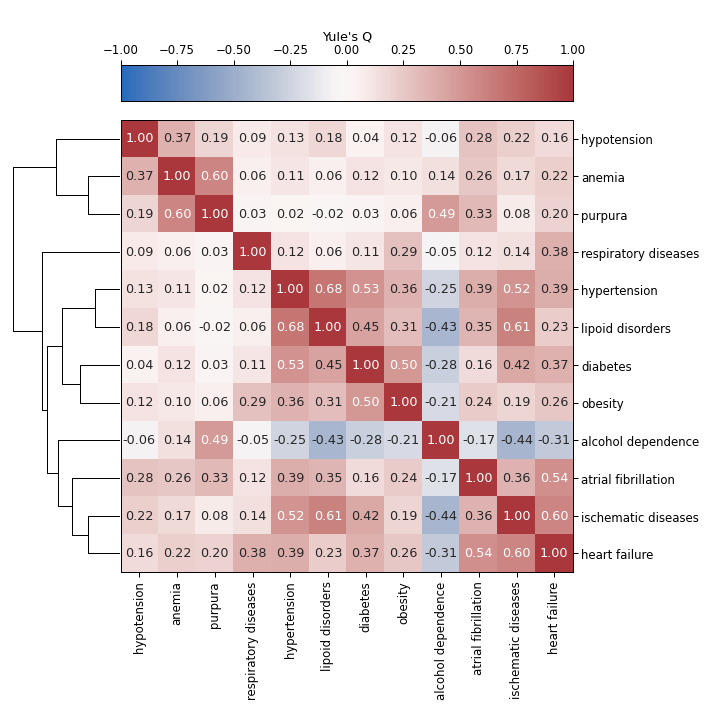

In [4]:
dissimilarity = 1 - np.abs(df_yuleQ.values)
linkage = scp.cluster.hierarchy.linkage(scp.spatial.distance.squareform(dissimilarity), method='ward')
g_ = sns.clustermap(df_yuleQ, row_linkage=linkage)
plt.close()
order = g_.dendrogram_row.reordered_ind
df_yuleQ_ = df_yuleQ.iloc[:, order]
g = sns.clustermap(df_yuleQ_, row_linkage=linkage, col_cluster=False, annot=True, center=0, cmap='vlag', vmin=-1, vmax=1,
                   cbar_kws={'orientation': 'horizontal', 'label' : 'Yule\'s Q'}, figsize=(10, 10), fmt='.2f', tree_kws={'color':'black', 'linewidth': 1})
for _, spine in g.ax_heatmap.spines.items():
    spine.set_visible(True)
dendro_box = g.ax_col_dendrogram.get_position()
dendro_box.y0 = 0.85
dendro_box.y1 = 0.90
g.cax.set_position(dendro_box)
g.cax.xaxis.set_ticks_position('top')
g.cax.xaxis.set_label_position('top')
g.cax.set_frame_on(True)
for _, spine in g.cax.spines.items():
    spine.set_visible(True)
plt.savefig('./appendix_A.pdf', format='pdf', bbox_inches='tight')